### 필요모듈 import & sav파일을 판다스 데이터프레임으로 읽어오기 위해서 pyreadstat 다운로드

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
!pip install pyreadstat

     ---------------------------------------- 2.4/2.4 MB 6.7 MB/s eta 0:00:00


### 복지패널 데이터 spss전용파일 pandas데이터프레임으로 바꾸고, 카피뜨기

In [51]:

raw_welfare = pd.read_spss('../Data/Koweps_hpwc14_2019_beta2.sav')
welfare = raw_welfare.copy()

### 변수명이 복잡하므로, 알아보기 쉽게 변수명 바꾸기

In [52]:
welfare = welfare.rename(columns = {'h14_g3'     : 'sex',            #  성별
                                    'h14_g4'     : 'birth',          #  태어난 연도
                                    'h14_g10'    : 'marriage_type',  #  혼인 상태
                                    'h14_g11'    : 'religion',       #  종교 
                                    'p1402_8aq1' : 'income',         #  월급 
                                    'h14_eco9'   : 'code_job',       #  직업 코드
                                    'h14_reg7'   : 'code_region'})   #  지역 코드

--------------
## 데이터 조사(기초 EDA)

In [53]:
welfare.head(10)

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,20101.0,0.0,NaN,0.291589,0.291589,1307.764781,1307.764781,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,30101.0,0.0,NaN,0.419753,0.419753,1882.570960,1882.570960,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,40101.0,0.0,NaN,0.265263,0.265980,1189.691668,1192.908537,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,60101.0,0.0,NaN,0.494906,0.495941,2219.630833,2224.273816,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,60101.0,0.0,NaN,1.017935,1.017935,4565.389177,4565.389177,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN
5,6.0,1.0,1.0,60101.0,0.0,NaN,0.420394,0.737226,1885.445669,3306.423482,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
6,6.0,1.0,1.0,60101.0,0.0,NaN,0.182913,0.183408,820.357969,822.576178,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
7,6.0,1.0,1.0,60101.0,0.0,NaN,0.262072,0.262072,1175.380055,1175.380055,...,NaN,,NaN,NaN,NaN,NaN,243.0,NaN,0.0,NaN
8,8.0,1.0,1.0,80101.0,0.0,NaN,0.133319,0.133319,597.930077,597.930077,...,NaN,,NaN,NaN,NaN,NaN,410.0,NaN,0.0,NaN
9,10.0,1.0,1.0,100101.0,0.0,NaN,0.544463,0.567236,2441.888587,2544.024609,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


- 컬럼이 너무 많으므로, 중요한 컬럼(이름을 바꾼컬럼)만 조사해보기

In [56]:
welfare.loc[0:10,['sex','birth','marriage_type','religion','income','code_job','code_region']]

,sex,birth,marriage_type,religion,income,code_job,code_region
0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0
1,1.0,1948.0,2.0,2.0,NaN,NaN,1.0
2,1.0,1942.0,3.0,1.0,107.0,762.0,1.0
3,1.0,1962.0,1.0,1.0,192.0,855.0,1.0
4,2.0,1963.0,1.0,1.0,NaN,NaN,1.0
5,2.0,2003.0,0.0,1.0,NaN,NaN,1.0
6,1.0,1927.0,1.0,1.0,NaN,NaN,1.0
7,2.0,1934.0,1.0,1.0,27.0,941.0,1.0
8,2.0,1940.0,2.0,1.0,27.0,999.0,2.0
9,2.0,1970.0,3.0,1.0,NaN,NaN,1.0


In [25]:
welfare.loc[:,['sex','birth','marriage_type','religion','income','code_job','code_region']].shape

(14418, 7)

In [26]:
type(welfare.loc[:,['sex','birth','marriage_type','religion','income','code_job','code_region']])

pandas.core.frame.DataFrame

- 이책에서는 위 7개의 컬럼에 대한 전처리만 담으므로 7개의 컬럼만 데이터프레임으로 재정의해주는것이 좋을것같다.

In [35]:
welfare=welfare.loc[:,['sex','birth','marriage_type','religion','income','code_job','code_region']]

- income변수와 code_job변수는 결측지 처리를 해줘야 할것같다.

In [36]:
welfare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sex            14418 non-null  float64
 1   birth          14418 non-null  float64
 2   marriage_type  14418 non-null  float64
 3   religion       14418 non-null  float64
 4   income         4534 non-null   float64
 5   code_job       6878 non-null   float64
 6   code_region    14418 non-null  float64
dtypes: float64(7)
memory usage: 788.6 KB


In [37]:
welfare.describe()

,sex,birth,marriage_type,religion,income,code_job,code_region
count,14418.000000,14418.000000,14418.000000,14418.000000,4534.000000,6878.00000,14418.000000
mean,1.548828,1969.280205,1.764184,1.542031,268.455007,587.54827,3.730684
std,0.497627,24.402250,1.613871,0.498248,198.021206,264.23507,2.049151
min,1.000000,1907.000000,0.000000,1.000000,0.000000,111.00000,1.000000
25%,1.000000,1948.000000,1.000000,1.000000,150.000000,313.00000,2.000000
50%,2.000000,1968.000000,1.000000,2.000000,220.000000,611.00000,3.000000
75%,2.000000,1990.000000,2.000000,2.000000,345.750000,873.00000,5.000000
max,2.000000,2018.000000,6.000000,2.000000,1892.000000,1009.00000,7.000000


-----------
## 데이터 전처리(변수별)

### A.sex : 명목형변수

In [38]:
welfare['sex'].value_counts()

2.0    7913
1.0    6505
Name: sex, dtype: int64

- 지금은 NA값이나 이상치 값이 없지만 코드북에는 '9' : 무응답 같은  
값들이 있을수도 있으므로 그 값을 결측처리하고 EDA를 해야한다.

In [59]:

welfare['sex'] = np.where(welfare['sex'] == 9, np.nan, welfare['sex'])
welfare['sex'].isnull().sum()

0

- 1값은 male, 2값은 female로 변수설정

In [61]:
welfare['sex']=np.where(welfare['sex']==1.0, 'male', 'female')
welfare['sex'].value_counts()

female    7913
male      6505
Name: sex, dtype: int64

- countplot으로 한눈에보기

<AxesSubplot:xlabel='sex', ylabel='count'>

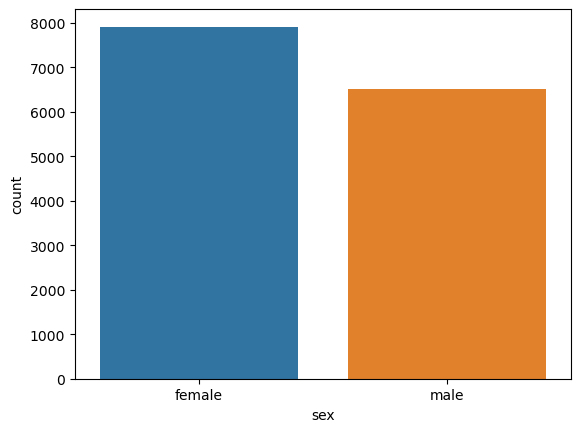

In [42]:
sns.countplot(data = welfare, x = 'sex')

### B.income :연속형변수

In [43]:
welfare['income'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 14418 entries, 0 to 14417
Series name: income
Non-Null Count  Dtype  
--------------  -----  
4534 non-null   float64
dtypes: float64(1)
memory usage: 112.8 KB


In [44]:
welfare['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

In [46]:
welfare['income'].isnull().sum()

9884

<div style="background-color: red; padding: 20px;">
- 결측값이 9884개로 많은 편이므로 이 데이터에 대해서 결측처리를 해줘야한다.  
    - 코드 북을 참고하면 결측값은 9999 값으로 코딩했다고 하므로 9999에 해당하는 row를 nan처리 해주면 될것같다.
    하지만 9999값을 가진 row가 없으므로, 책의 코드 np.where로는 결측지를 잡아내지 못한다.    
    **isna.sum값이 0이 되야 결측 전처리가 된건데 이책의 코드는 계속9884가 뜬다**  
</div>

In [55]:
welfare['income']=np.where(welfare['income']==9999,np.nan,welfare['income'])
welfare['income'].isna().sum() 

9884

- fillna로 결측값을 평균값인 268로 대체해서 채워주면서 현재 상황에서의 결측지 대체 문제 해결

In [57]:
welfare['income'].fillna(268.0,inplace=True)
welfare['income'].isna().sum()

0

In [58]:
welfare['income'].head(20)

0     268.0
1     268.0
2     107.0
3     192.0
4     268.0
5     268.0
6     268.0
7      27.0
8      27.0
9     268.0
10    268.0
11    268.0
12    268.0
13    268.0
14    338.0
15    200.0
16    268.0
17    268.0
18    268.0
19    110.0
Name: income, dtype: float64

- 구간별 빈도수를 잘표현해 주는 히스토그램으로 income변수의 분포도 조사

<AxesSubplot:xlabel='income', ylabel='Count'>

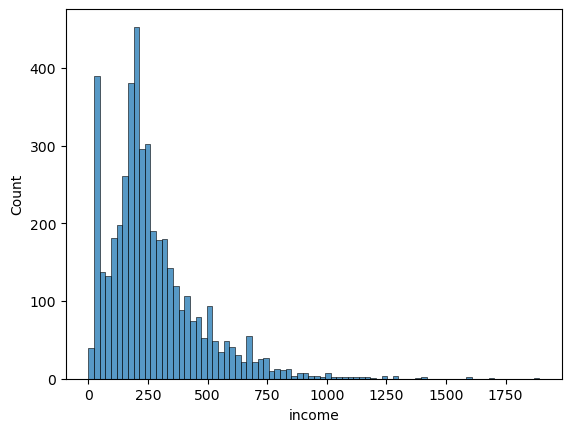

In [45]:
sns.histplot(data=welfare, x = 'income')

- 성별에 따른 월급 차이 분석
    - 평균 차이 분석

In [62]:
sex_income= welfare.groupby('sex',as_index=False) \
                   .agg(mean_income=('income','mean'))

sex_income

,sex,mean_income
0,female,244.818906
1,male,296.515757


### C.birth:연속형변수

In [65]:
welfare['birth'].dtypes

dtype('float64')

In [66]:
welfare['birth'].describe()

count    14418.000000
mean      1969.280205
std         24.402250
min       1907.000000
25%       1948.000000
50%       1968.000000
75%       1990.000000
max       2018.000000
Name: birth, dtype: float64

In [67]:
welfare['birth'].isnull().sum()

0

- 생년은 있는데 나이가 없으므로 현재 2024을 기준으로 해서 나이 컬럼을 추가해주자.

In [68]:
welfare=welfare.assign(age=2024-welfare['birth']+1)
welfare['age'].describe()

count    14418.000000
mean        55.719795
std         24.402250
min          7.000000
25%         35.000000
50%         57.000000
75%         77.000000
max        118.000000
Name: age, dtype: float64

-----------
## 데이터 간 관계 세부 분석(세부 EDA)

### 나이와 월급관계 분석
    

    

- 나이별 월급(평균)

In [74]:
IncomeForAge=welfare.groupby('age',as_index=False) \
                    .agg(avg_income=('income','mean'))
                
IncomeForAge.tail(20)

,age,avg_income
82,89.0,245.035176
83,90.0,251.288235
84,91.0,256.961832
85,92.0,257.400000
86,93.0,258.041322
87,94.0,258.848101
88,95.0,263.696429
89,96.0,252.500000
90,97.0,258.360000
91,98.0,268.000000


- 그래프로 나타내기

<AxesSubplot:xlabel='age', ylabel='avg_income'>

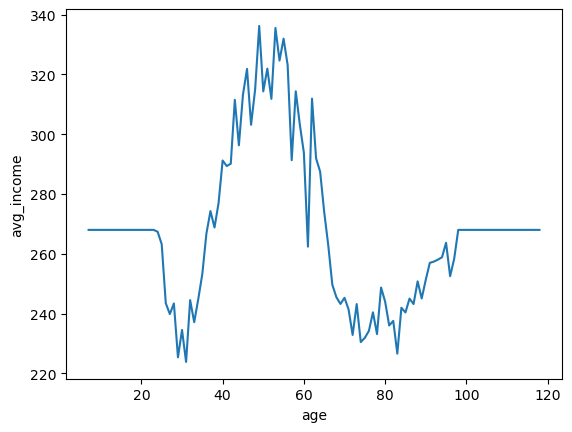

In [75]:
sns.lineplot(data=IncomeForAge,x='age',y='avg_income')

- 연령대 별 월급
    - 나이별로 급간을 나눠서 연령대 변수 생성
    - 연령별 평균월급 구하기
    - 그래프로 나타내기

In [76]:
welfare['age'].describe()

count    14418.000000
mean        55.719795
std         24.402250
min          7.000000
25%         35.000000
50%         57.000000
75%         77.000000
max        118.000000
Name: age, dtype: float64

<div style="background-color: red; padding: 20px;">
분위수 대로 25%, 50%, 75%로 연령별 급간을 설정하자. 'np.where 는 판다스 넘파이 의 조건문'
</div>

In [81]:
welfare=welfare.assign(age_category=np.where(welfare['age']<=35, 'YB',
                                             np.where(welfare['age']<=77,'MB','OB')))
welfare['age_category'].value_counts()

MB    7238
YB    3609
OB    3571
Name: age_category, dtype: int64

In [82]:
welfare['age_category'].isnull().sum()

0

In [ ]:
age_category_income=welfare.groupby('age_category',as_index=False) \
                           .agg(avg_income=())